In [1]:
# Importing Libaries ToolKit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


# Exploring a DataFrame


In [2]:
# Importing & Inspecting Data
data1 = pd.read_csv('train.csv')
data2 = pd.read_csv('test.csv')
data3 = pd.read_csv('gender_submission.csv')

In [3]:
data1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data1.shape

(891, 12)

In [7]:
# Handle Missing Values
print(data1.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


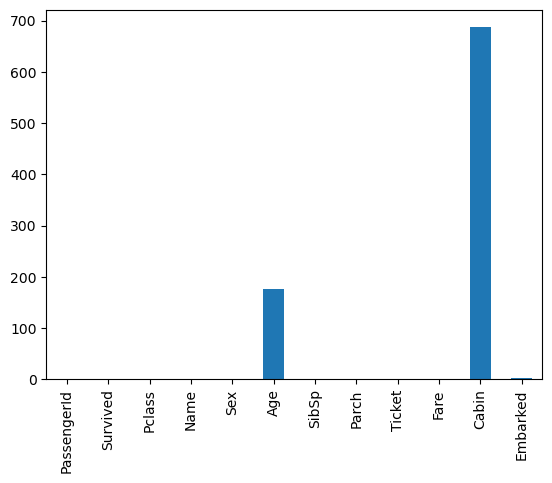

In [8]:
#Plotting missing values
data1.isna().sum().plot(kind="bar")
plt.show()

In [9]:
threshold = len(data1) * 0.05
print(threshold)

44.550000000000004


In [10]:
# fill the Null value in column Age beacuse its important 
# the column with missing values
column_to_fill = 'Age'

# Fill missing values in the specified column (e.g., with the mean value)
mean_value = data1[column_to_fill].mean()
data1[column_to_fill].fillna(mean_value, inplace=True)

# Display the DataFrame after filling missing values
print(data1)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

In [11]:
#data1['Age'].fillna(data1['Age'].mode()[0], inplace=True)

In [12]:
# Specify the column with missing values
column_to_fill = 'Embarked'

# Fill missing values in the specified string column with the most frequent value (mode)
most_frequent_value = data1[column_to_fill].mode()[0]
data1[column_to_fill].fillna(most_frequent_value, inplace=True)

In [13]:
cols_to_drop = data1.columns[data1.isna().sum() <= threshold]
print(cols_to_drop)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [14]:
cols_with_missing_values = data1.columns[data1.isna().sum() > 0]
print(cols_with_missing_values)

Index(['Cabin'], dtype='object')


In [15]:
cols_to_drop = data1.columns[data1.isna().sum() <= threshold]
print(cols_to_drop)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [16]:
# Display the modified DataFrame
print(data1)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

In [17]:
print(data1.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [18]:
col_with_missing_value = data1.columns[data1.isna().sum() > 0]
print(col_with_missing_value)

Index(['Cabin'], dtype='object')


In [19]:
# To delete multiple columns:
columns_to_delete = ['Cabin']
data1.drop(columns_to_delete, axis=1, inplace=True)

In [20]:
col_with_missing_value = data1.columns[data1.isna().sum() > 0]
print(col_with_missing_value)

Index([], dtype='object')


In [21]:
print(data1.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [22]:
data1['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '29.69911764705882'),
  Text(1, 0, '24.0'),
  Text(2, 0, '22.0'),
  Text(3, 0, '18.0'),
  Text(4, 0, '28.0'),
  Text(5, 0, '30.0'),
  Text(6, 0, '19.0'),
  Text(7, 0, '21.0'),
  Text(8, 0, '25.0'),
  Text(9, 0, '36.0'),
  Text(10, 0, '29.0'),
  Text(11, 0, '35.0'),
  Text(12, 0, '32.0'),
  Text(13, 0, '26.0'),
  Text(14, 0, '27.0'),
  Text(15, 0, '31.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '34.0'),
  Text(18, 0, '20.0'),
  Text(19, 0, '23.0')])

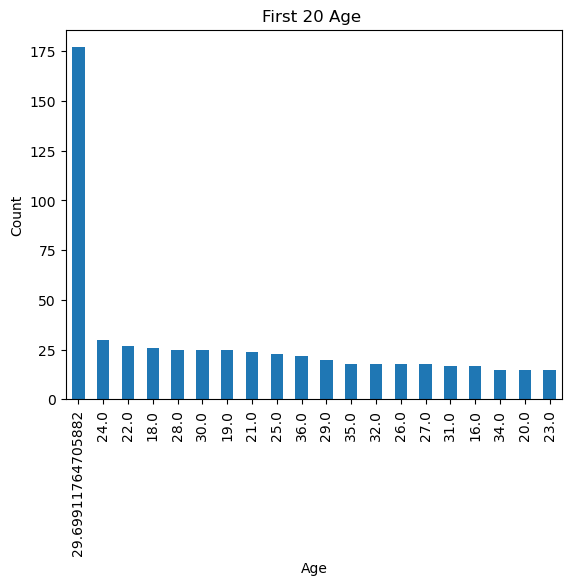

In [23]:
Age_counts = data1['Age'].value_counts().head(20)
# Plotting the graph
Age_counts.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('First 20 Age ')
plt.xticks(rotation=90)

In [24]:
data1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# Data Preprocessing:

# Find the outlier and handle

In [25]:
# Find the outlier and handle
data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


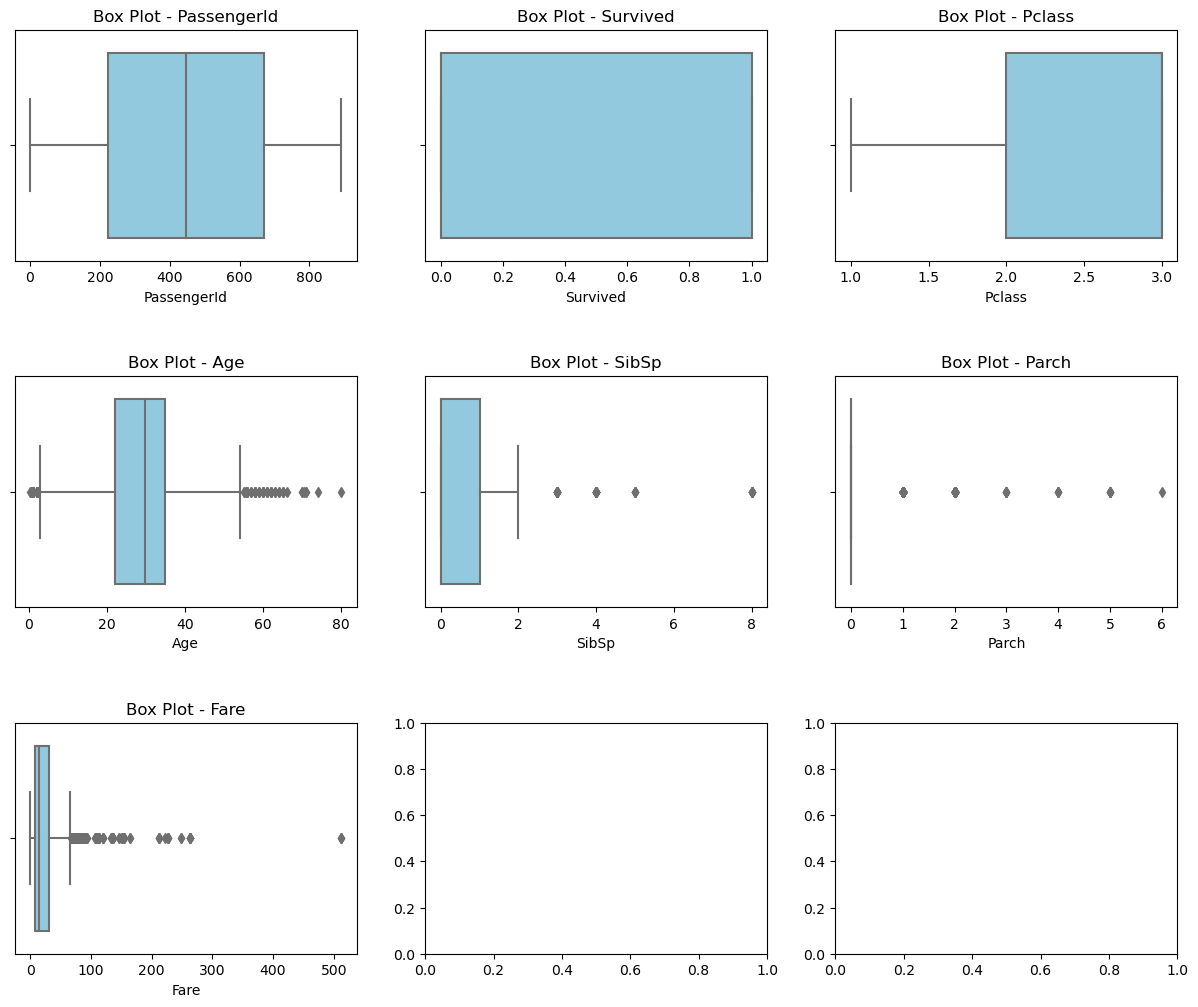

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Replace this with your actual DataFrame
data = data1.copy()

# Select columns with numerical values
numerical_columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
numerical_data = data[numerical_columns]

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)

# Create box plots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(ax=axes[i // 3, i % 3], x=data[column], color='skyblue')
    axes[i // 3, i % 3].set_title(f'Box Plot - {column}')

plt.show()


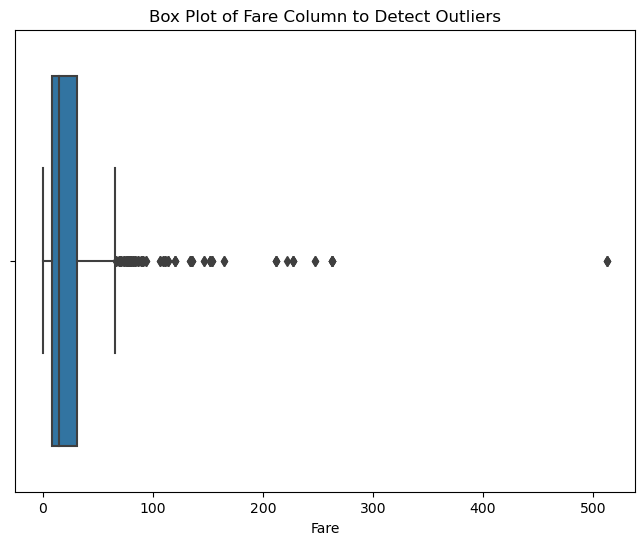

In [27]:
#Are there any outliers in the fare (Fare) column?
# Plotting a box plot to detect outliers in the Fare column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data1['Fare'])
plt.title('Box Plot of Fare Column to Detect Outliers')
plt.show()

23.0896
65.6344 -26.724
     Pclass        Age
1         1  38.000000
27        1  19.000000
31        1  29.699118
34        1  28.000000
52        1  49.000000
..      ...        ...
846       3  29.699118
849       1  29.699118
856       1  45.000000
863       3  29.699118
879       1  56.000000

[116 rows x 2 columns]
count    775.000000
mean      17.822091
std       13.578085
min        0.000000
25%        7.895800
50%       13.000000
75%       26.000000
max       65.000000
Name: Fare, dtype: float64


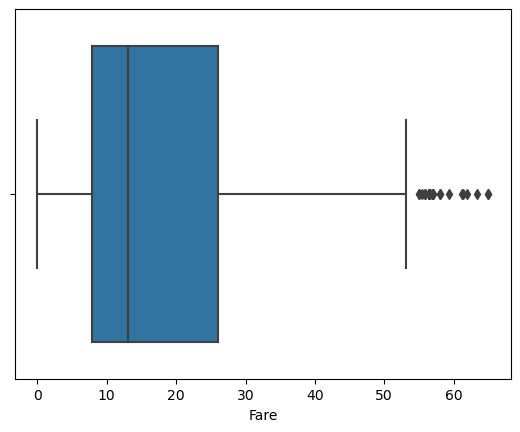

In [28]:
# Using the interquartile range
 # 75th percentile
seventy_fifth = data1["Fare"].quantile(0.75)
# 25th percentile
twenty_fifth = data1["Fare"].quantile(0.25)
# Interquartile range
data_iqr = seventy_fifth - twenty_fifth
print(data_iqr)
# Identifying outliers
# Upper threshold
upper = seventy_fifth + (1.5 * data_iqr)
# Lower threshold
lower = twenty_fifth - (1.5 * data_iqr)
print(upper, lower)
# Subsetting our data
print(data1[(data1["Fare"] < lower) | (data1["Fare"] > upper)] \
[["Pclass","Age"]])
no_outliers = data1[(data1["Fare"] > lower) & (data1["Fare"] < upper)]

print(no_outliers["Fare"].describe())
sns.boxplot(data=no_outliers,x="Fare")
plt.show()

In [29]:
print(data1["Sex"].value_counts())

male      577
female    314
Name: Sex, dtype: int64


In [30]:
print(data1["Embarked"].value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [31]:
print(data1["Survived"].value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [32]:
print(data1["Pclass"].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [33]:
print(data1["SibSp"].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


# visualization 

<Axes: >

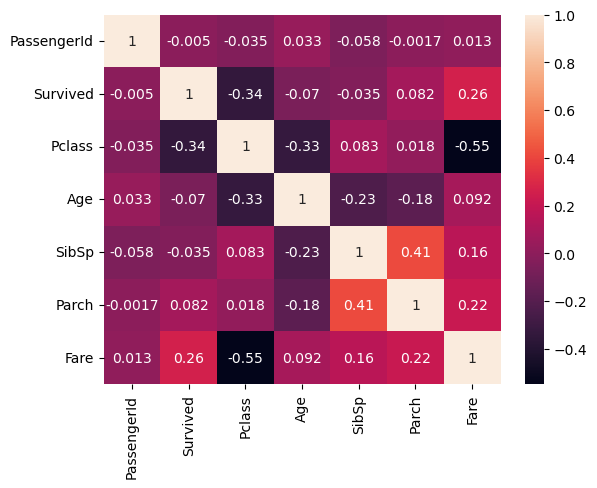

In [34]:
data1_numeric = data1.select_dtypes(include=['number'])
sns.heatmap(data=data1_numeric.corr(),annot=True)

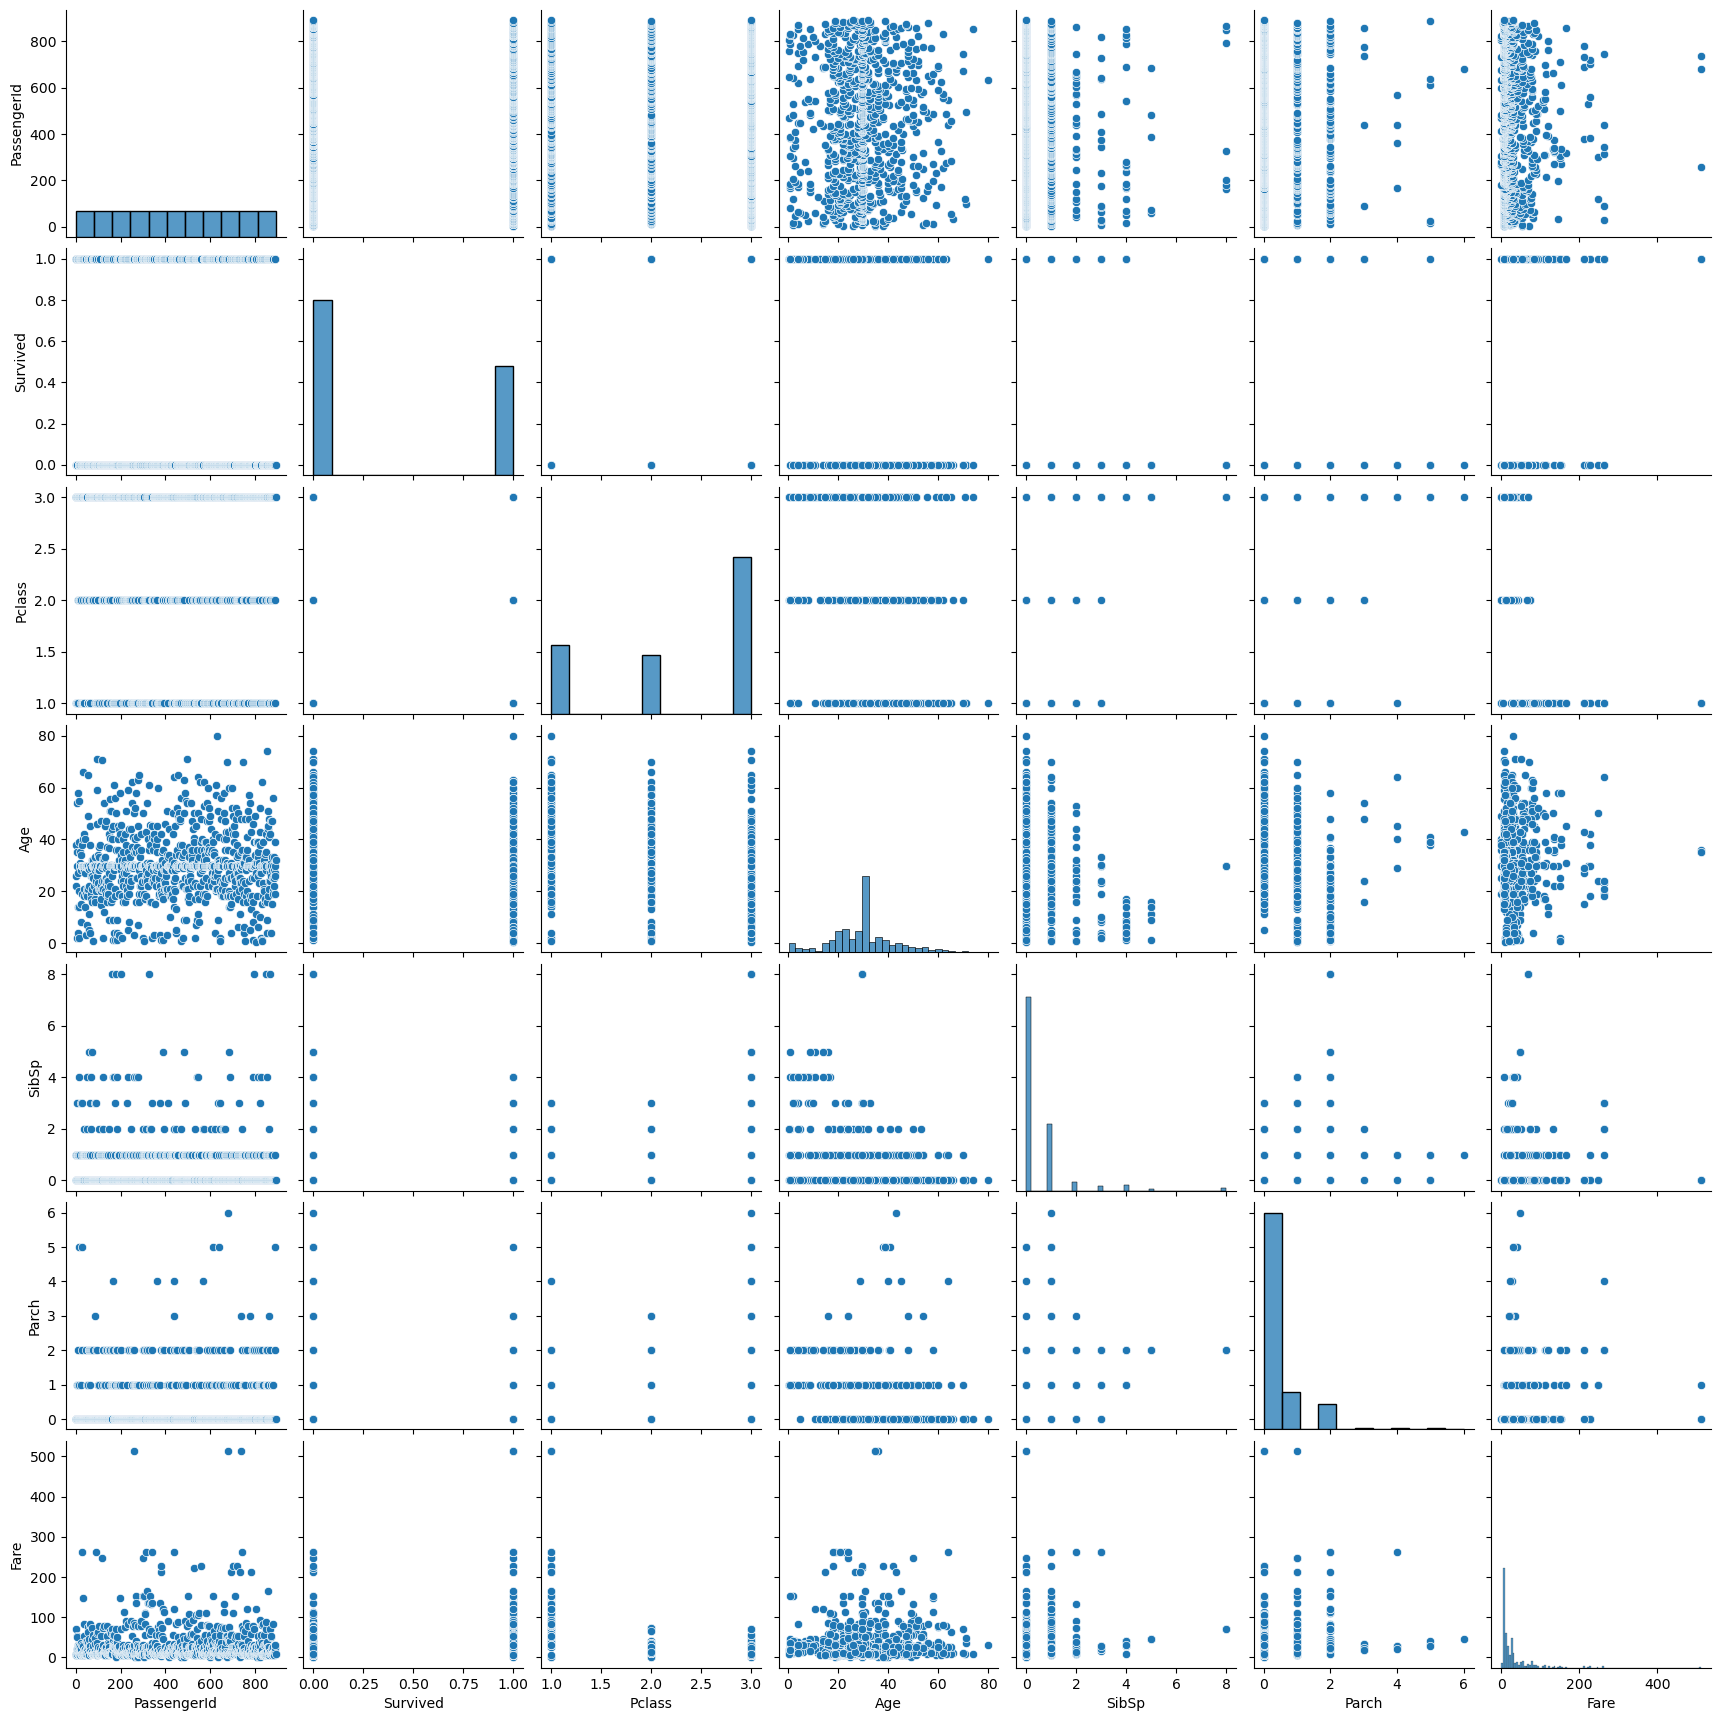

In [35]:
sns.pairplot(data=data1)
plt.show()

In [36]:
# Passenger Analysis:
# What is the distribution of passenger ages?
#How does the passenger class (Pclass) vary in terms of passenger count?
#What are the most common embarkation points (Embarked)?
#Are there any patterns in the distribution of fares paid by passengers?
#How does the gender (Sex) distribution look like in the dataset?

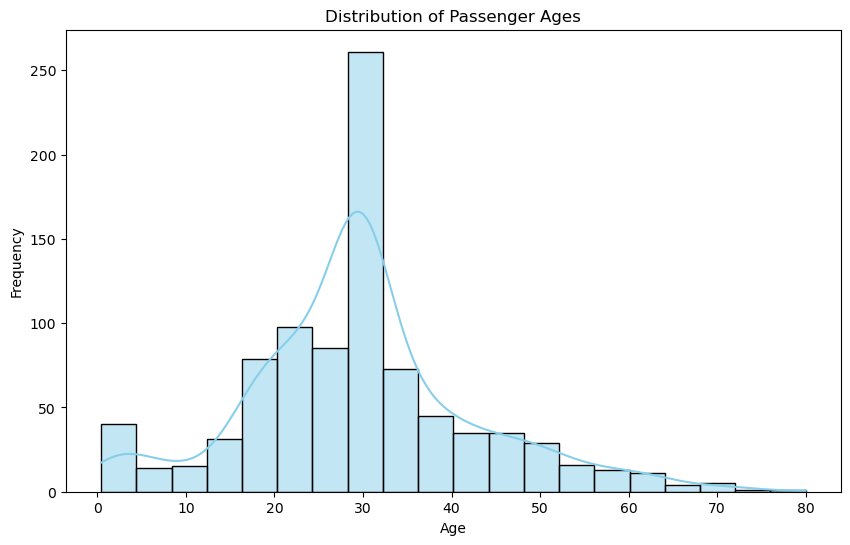

In [37]:
# Plotting the distribution of passenger ages using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data1['Age'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

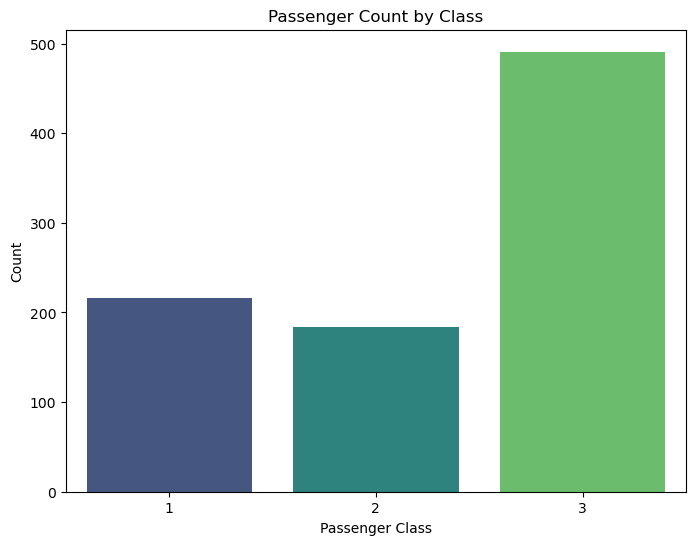

In [38]:
# Plotting the count of passengers in each class
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=data1, palette='viridis')
plt.title('Passenger Count by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

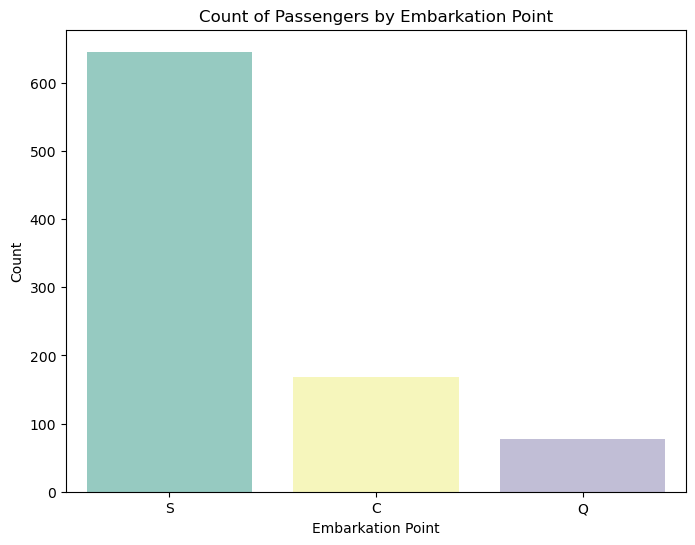

In [39]:
# Plotting the most common embarkation points
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=data1, palette='Set3')
plt.title('Count of Passengers by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.show()

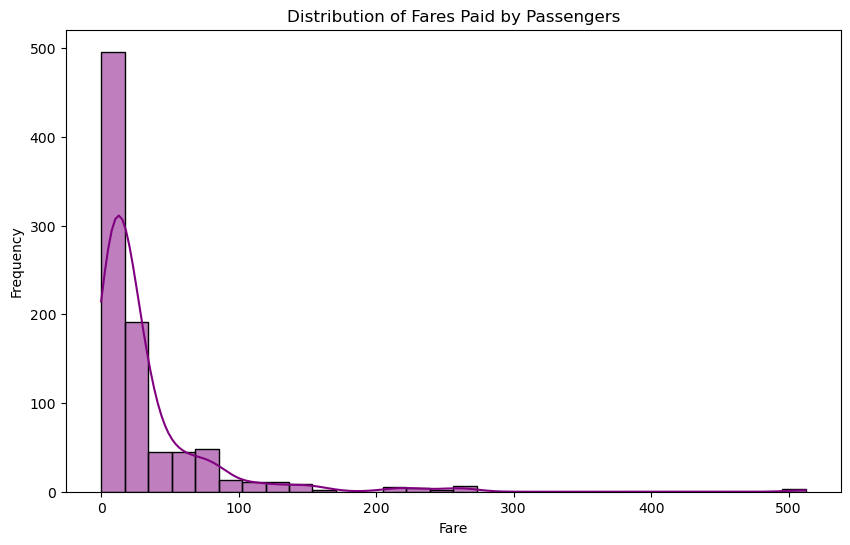

In [40]:
# Plotting the distribution of fares
plt.figure(figsize=(10, 6))
sns.histplot(data1['Fare'], bins=30, kde=True, color='purple')
plt.title('Distribution of Fares Paid by Passengers')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

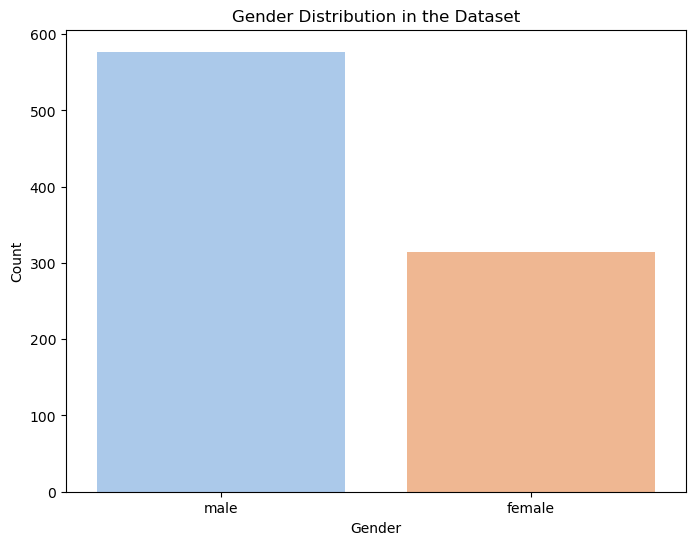

In [41]:
# Plotting the gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=data1, palette='pastel')
plt.title('Gender Distribution in the Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [42]:
# Survival Analysis:
  # - What is the distribution of survived and non-survived passengers?
  # - How does the survival rate vary across different passenger classes (Pclass)?
  # - Is there any correlation between survival and gender (Sex)?
  #- Are there any patterns in survival based on the passenger's age (Age)?
  #- Does the number of siblings/spouses (SibSp) or parents/children (Parch) aboard the ship affect the survival rate?
  #- Is there any correlation between survival and Embarked ?
 #- what is Survival Distribution by Gender"

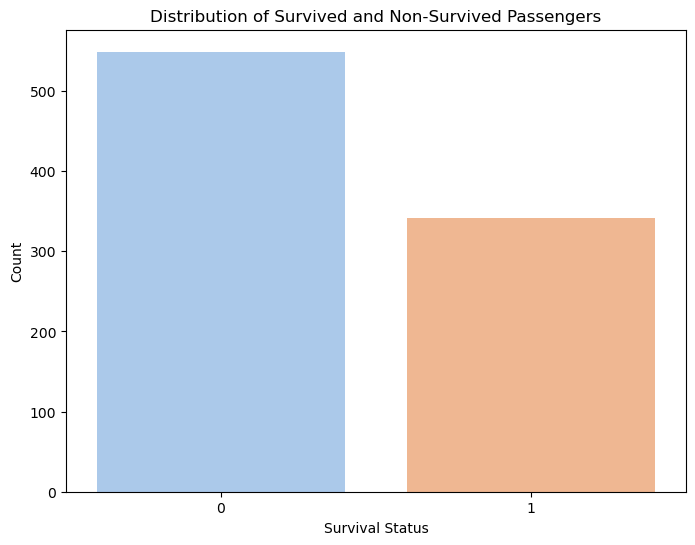

In [43]:
# Plotting the distribution of survived and non-survived passengers
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=data1, palette='pastel')
plt.title('Distribution of Survived and Non-Survived Passengers')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.show()


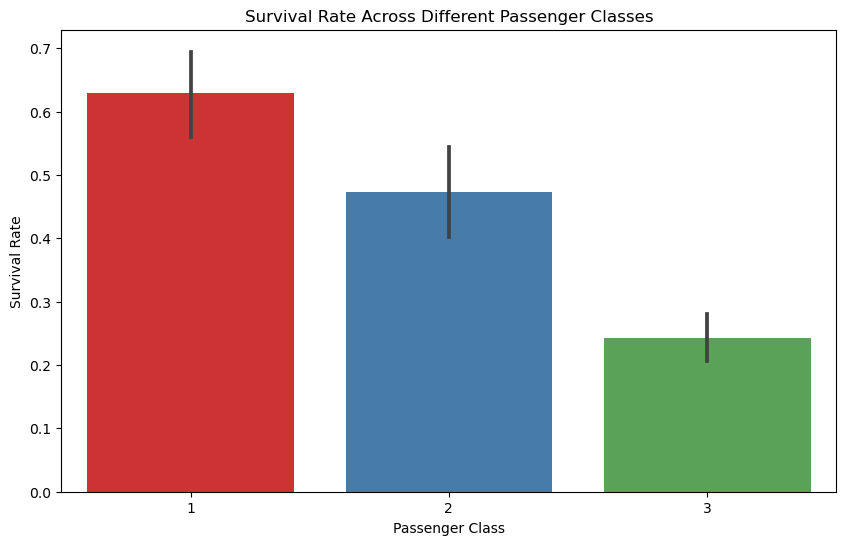

In [44]:
# Plotting the survival rate across different passenger classes
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=data1, palette='Set1')
plt.title('Survival Rate Across Different Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


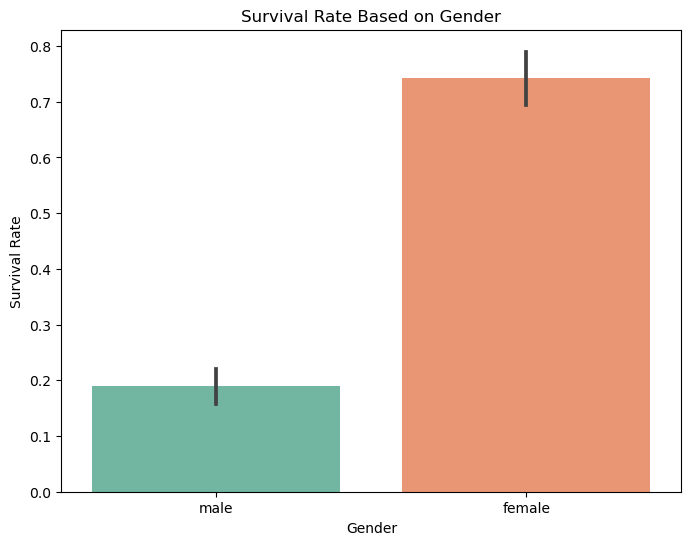

In [45]:
# Plotting the survival rate based on gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=data1, palette='Set2')
plt.title('Survival Rate Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


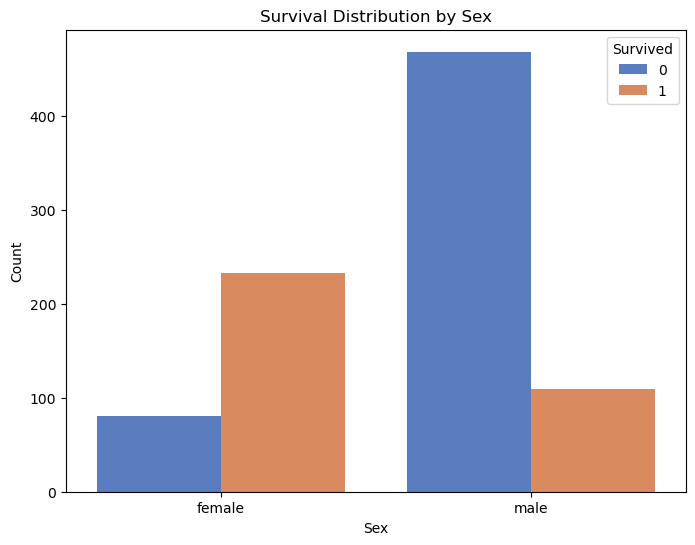

In [46]:

# Grouping by 'Sex' and 'Survived' and calculating the size of each group
sex_survived = data1.groupby(['Sex', 'Survived']).size().reset_index(name='Count')

# Plotting a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Count', hue='Survived', data=sex_survived, palette='muted')
plt.title('Survival Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


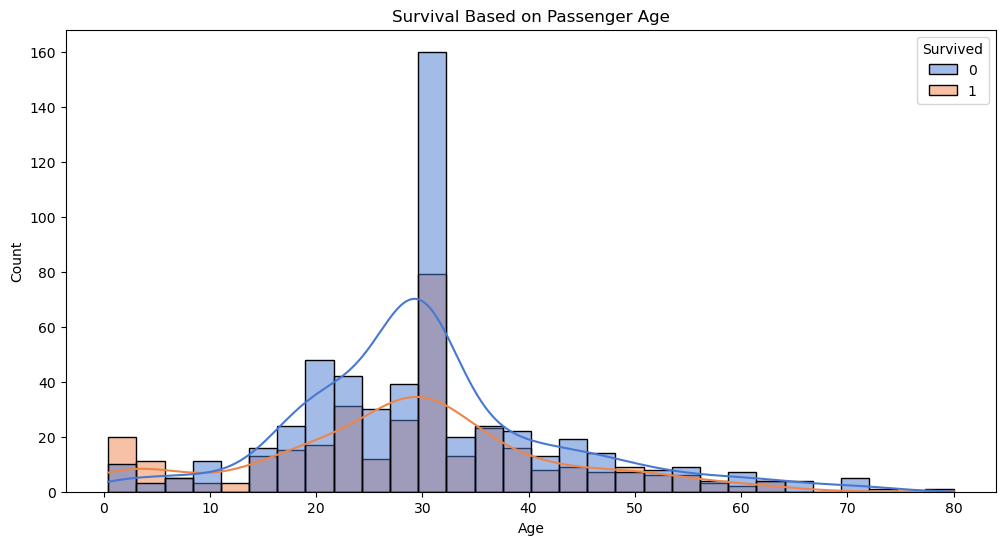

In [47]:
# Plotting survival based on age
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', hue='Survived', data=data1, bins=30, kde=True, palette='muted')
plt.title('Survival Based on Passenger Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


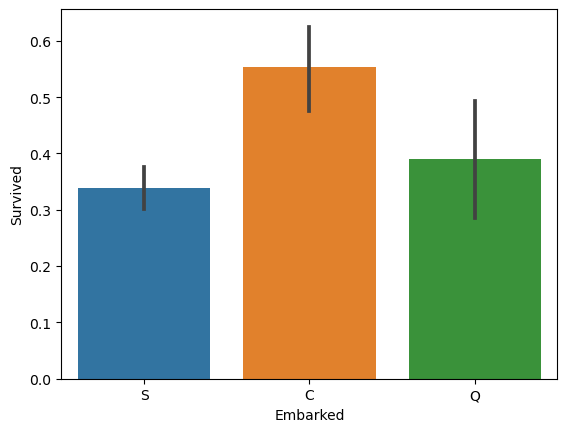

In [48]:
sns.barplot(data=data1,x="Embarked",y="Survived")
plt.show()

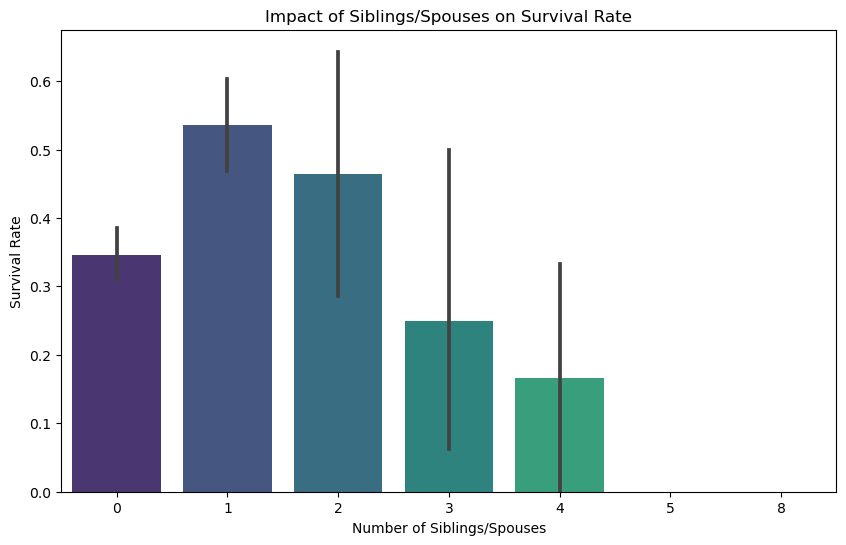

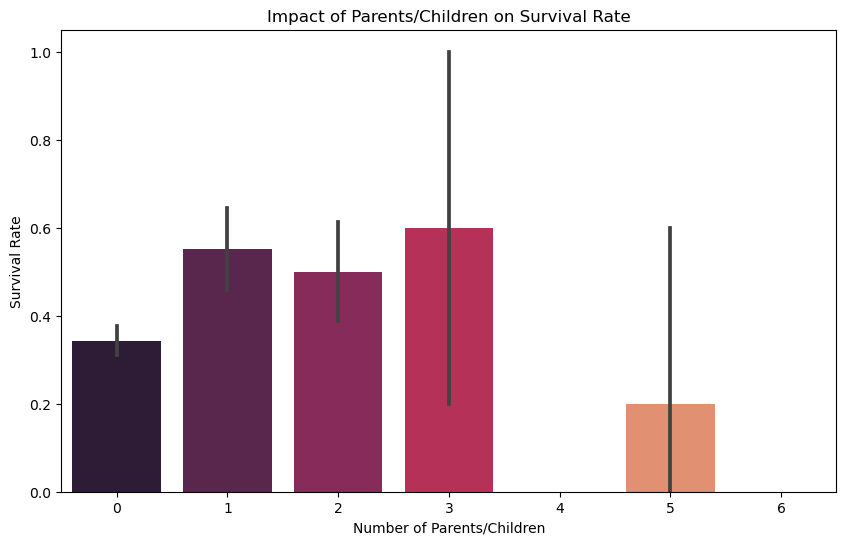

In [49]:
# Plotting the impact of SibSp on survival
plt.figure(figsize=(10, 6))
sns.barplot(x='SibSp', y='Survived', data=data1, palette='viridis')
plt.title('Impact of Siblings/Spouses on Survival Rate')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')
plt.show()

# Plotting the impact of Parch on survival
plt.figure(figsize=(10, 6))
sns.barplot(x='Parch', y='Survived', data=data1, palette='rocket')
plt.title('Impact of Parents/Children on Survival Rate')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Survival Rate')
plt.show()


In [50]:
# Relationships and Correlations:
#- Is there any correlation between fare (Fare) and passenger class (Pclass)?
#- Are there any patterns in the distribution of fares based on the embarkation point (Embarked)?
#- How does the number of siblings/spouses (SibSp) or parents/children (Parch) vary across different passenger classes (Pclass)?
#- Is there any correlation between the passenger's age (Age) and the fare (Fare) they paid?


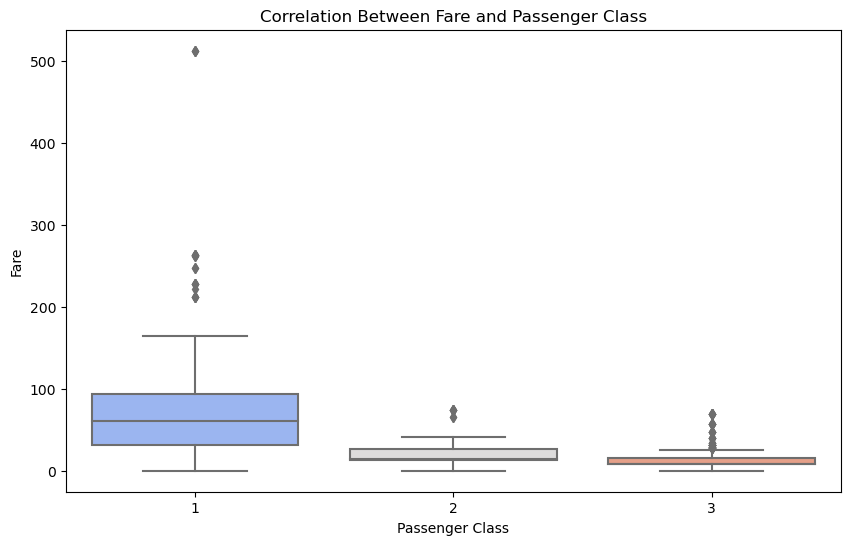

In [51]:
# Plotting the correlation between Fare and Pclass using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=data1, palette='coolwarm')
plt.title('Correlation Between Fare and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

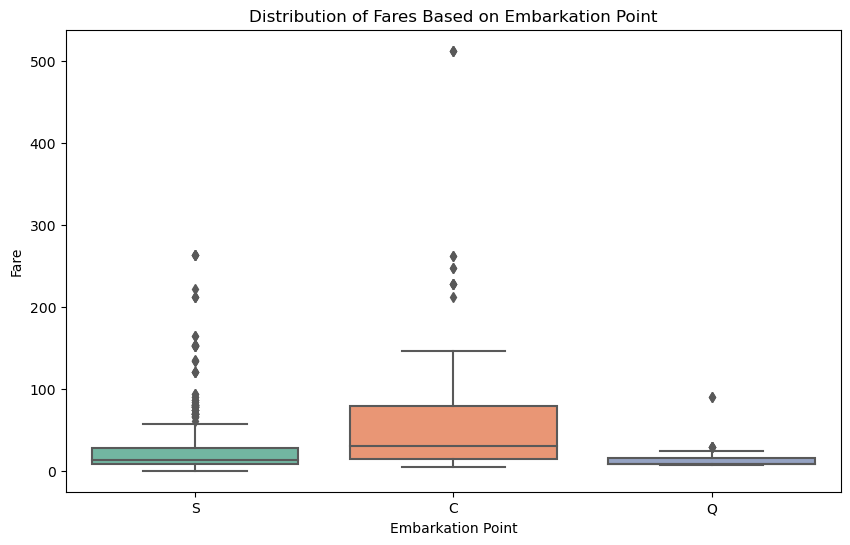

In [52]:
# Plotting the distribution of fares based on Embarked using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Embarked', y='Fare', data=data1, palette='Set2')
plt.title('Distribution of Fares Based on Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Fare')
plt.show()

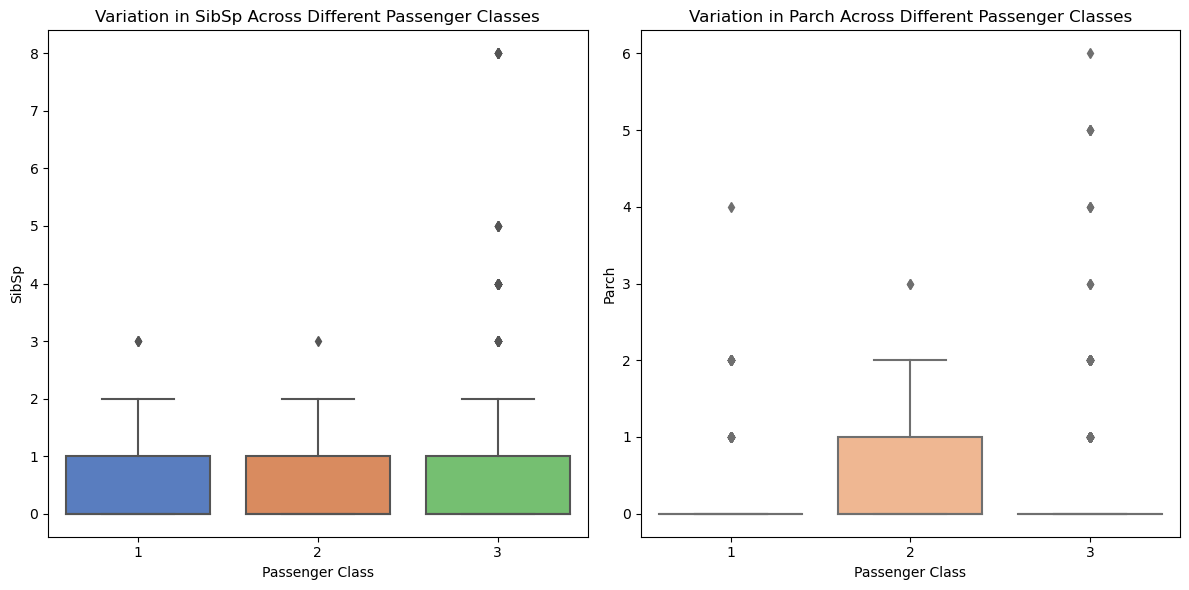

In [53]:
# Plotting the variation in SibSp across different Pclass using a box plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='SibSp', data=data1, palette='muted')
plt.title('Variation in SibSp Across Different Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('SibSp')

# Plotting the variation in Parch across different Pclass using a box plot
plt.subplot(1, 2, 2)
sns.boxplot(x='Pclass', y='Parch', data=data1, palette='pastel')
plt.title('Variation in Parch Across Different Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Parch')

plt.tight_layout()
plt.show()

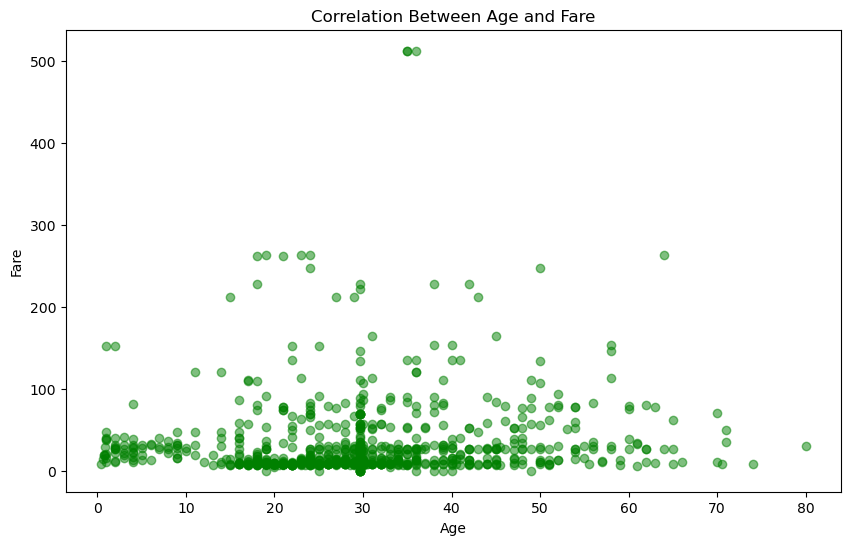

In [54]:
# Plotting the correlation between Age and Fare using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data1['Age'], data1['Fare'], alpha=0.5, color='green')
plt.title('Correlation Between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [55]:
#Additional Analysis:

#How does the survival rate vary based on the type of ticket (Ticket)?
#Are there any patterns in the passenger names (Name) that can be explored?
# what a bar plot of age distribution based on gender


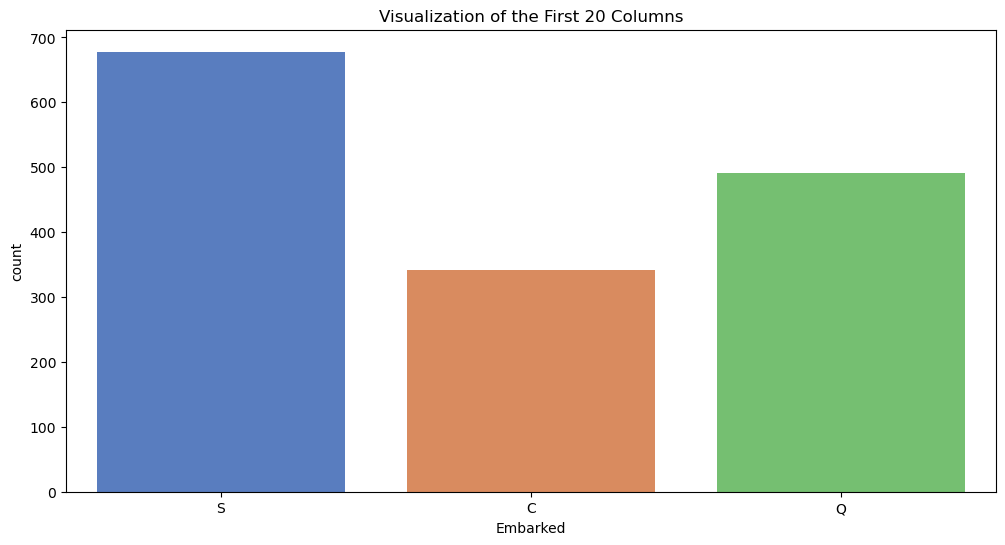

In [56]:


# Selecting the first 20 columns
first_20_columns = data1.iloc[:, :20]

# Plotting a bar plot for each column
plt.figure(figsize=(12, 6))
for column in first_20_columns.columns:
    sns.countplot(x=column, data=data1, palette='muted')
plt.title('Visualization of the First 20 Columns')
plt.show()



In [57]:
# Extracting titles from the 'Name' column
data1['Title'] = data1['Name'].str.extract(' ([A-Za-z]+)\.')

# Counting the occurrences of each title
title_counts = data1['Title'].value_counts()

# Displaying the counts of each title
print(title_counts)

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64


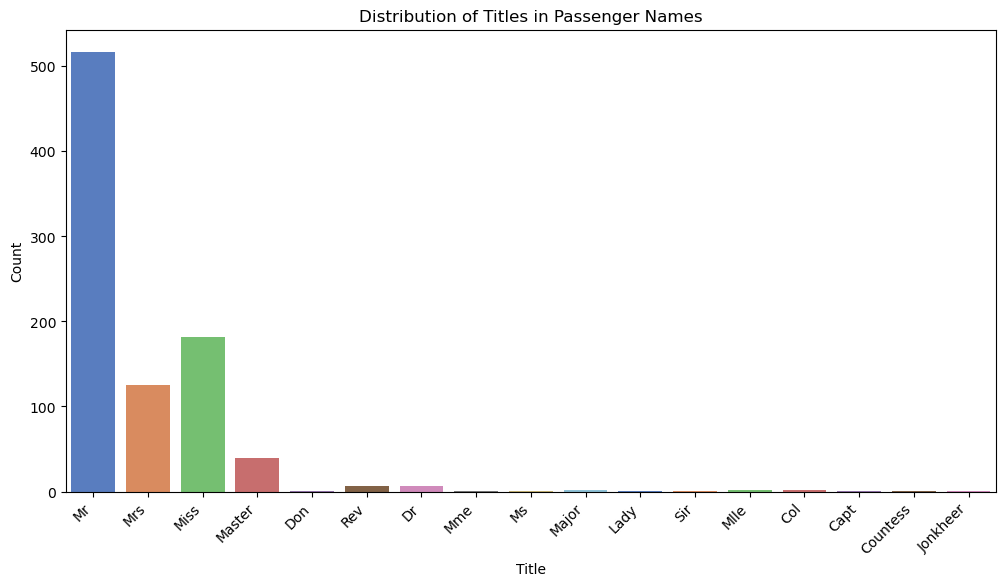

In [58]:
# Plotting the counts of each title
plt.figure(figsize=(12, 6))
sns.countplot(x='Title', data=data1, palette='muted')
plt.title('Distribution of Titles in Passenger Names')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()



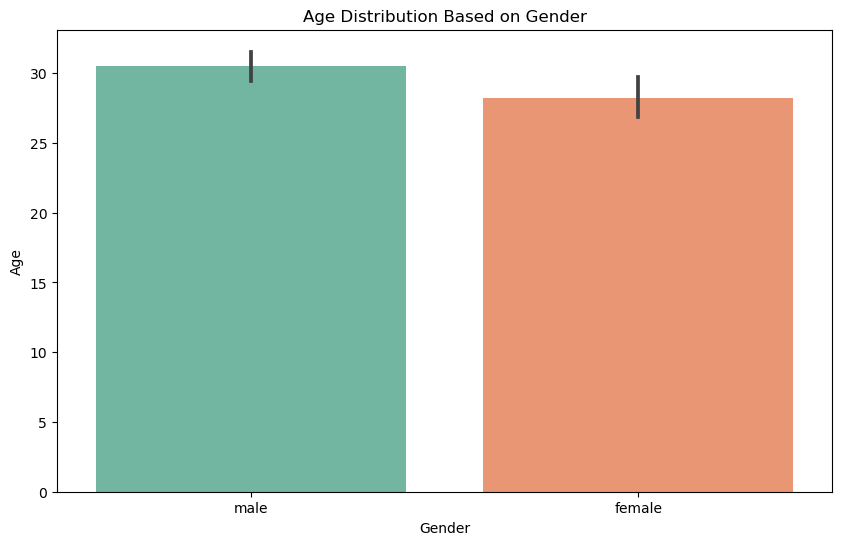

In [59]:
# Plotting a bar plot of age distribution based on gender
plt.figure(figsize=(10, 6))
sns.barplot(data=data1, x='Sex', y='Age', palette='Set2')
plt.title('Age Distribution Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


#  Model Building:

# Data validation

In [60]:
#Converting andanalyzing categorical data
print(data1.select_dtypes("object").head(0))

Empty DataFrame
Columns: [Name, Sex, Ticket, Embarked, Title]
Index: []


In [61]:
data1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Title           object
dtype: object

In [62]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()
# Fit and transform the 'Embarked' column
data1['Sex'] = label_encoder.fit_transform(data1['Sex'])
# Display the modified DataFrame
print("\nModified DataFrame:")
print(data1)


Modified DataFrame:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.000000      1   
2                               Heikkinen, Miss. Laina    0  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.000000      1   
4                             Allen, Mr. William Henry    1  35.000000      0   
..                                  

In [63]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()
# Fit and transform the 'Embarked' column
data1['Embarked'] = label_encoder.fit_transform(data1['Embarked'])

# Display the modified DataFrame
print("\nModified DataFrame:")
print(data1)



Modified DataFrame:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.000000      1   
2                               Heikkinen, Miss. Laina    0  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.000000      1   
4                             Allen, Mr. William Henry    1  35.000000      0   
..                                  

In [64]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int32  
 11  Title        891 non-null    object 
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 76.7+ KB


In [65]:
data1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title'],
      dtype='object')

In [66]:
data2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [67]:
# Handle Missing Value in data2
data2["Age"].fillna(data1["Age"].mean(),inplace=True) # Fill the Null Value 
data2["Fare"].fillna(data1["Fare"].mean(),inplace=True) # Fill the Null Value
data2["Embarked"].fillna(data1["Embarked"].mode()[0], inplace=True) # Fill the Null Value
# Converting the categorical to intger 
label_encoder = LabelEncoder()
data2["Sex"] = label_encoder.fit_transform(data2["Sex"])
data2["Embarked"] = label_encoder.fit_transform(data2["Embarked"])

In [68]:
# Features (X) and Target (y)
X_train = data1[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_train = data1['Survived']
X_test=data2[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_test= data3['Survived']


# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Preprocessing Pipeline
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('encoder', OneHotEncoder(drop='first'))        # One-hot encode categorical variables
])

# Apply preprocessing to features
X_processed = preprocessor.fit_transform(X_train)

# Splitting the data

# Model Training (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Evaluation with Random Forest Model:")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:\n", classification_rep_rf)


Evaluation with Random Forest Model:
Accuracy: 0.8181818181818182
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       266
           1       0.75      0.76      0.75       152

    accuracy                           0.82       418
   macro avg       0.80      0.80      0.80       418
weighted avg       0.82      0.82      0.82       418



In [70]:


# Model Training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
# Model Evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       266
           1       0.92      0.94      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.95      0.94       418
weighted avg       0.95      0.95      0.95       418



In [71]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],          
    'penalty': ['l2'],  
    'max_iter': [100, 200, 300]  
}

# Create a logistic regression model
logreg = LogisticRegression(solver='lbfgs')  # Specify the solver

# Create a GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Model Evaluation with the best model
y_pred_tuned = best_model.predict(X_test_scaled)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
classification_rep_tuned = classification_report(y_test, y_pred_tuned)

print("Evaluation with Tuned Model:")
print(f"Accuracy: {accuracy_tuned}")
print("Classification Report:\n", classification_rep_tuned)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}
Evaluation with Tuned Model:
Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       266
           1       0.92      0.94      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.95      0.94       418
weighted avg       0.95      0.95      0.95       418



<Axes: >

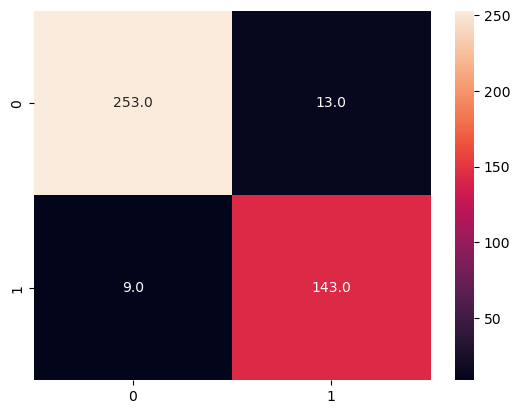

In [72]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(conf_matrix,annot=True,fmt="1.1f")

C:\Users\ACER\AppData\Local\Temp\ipykernel_14084\592500750.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data1.corr()


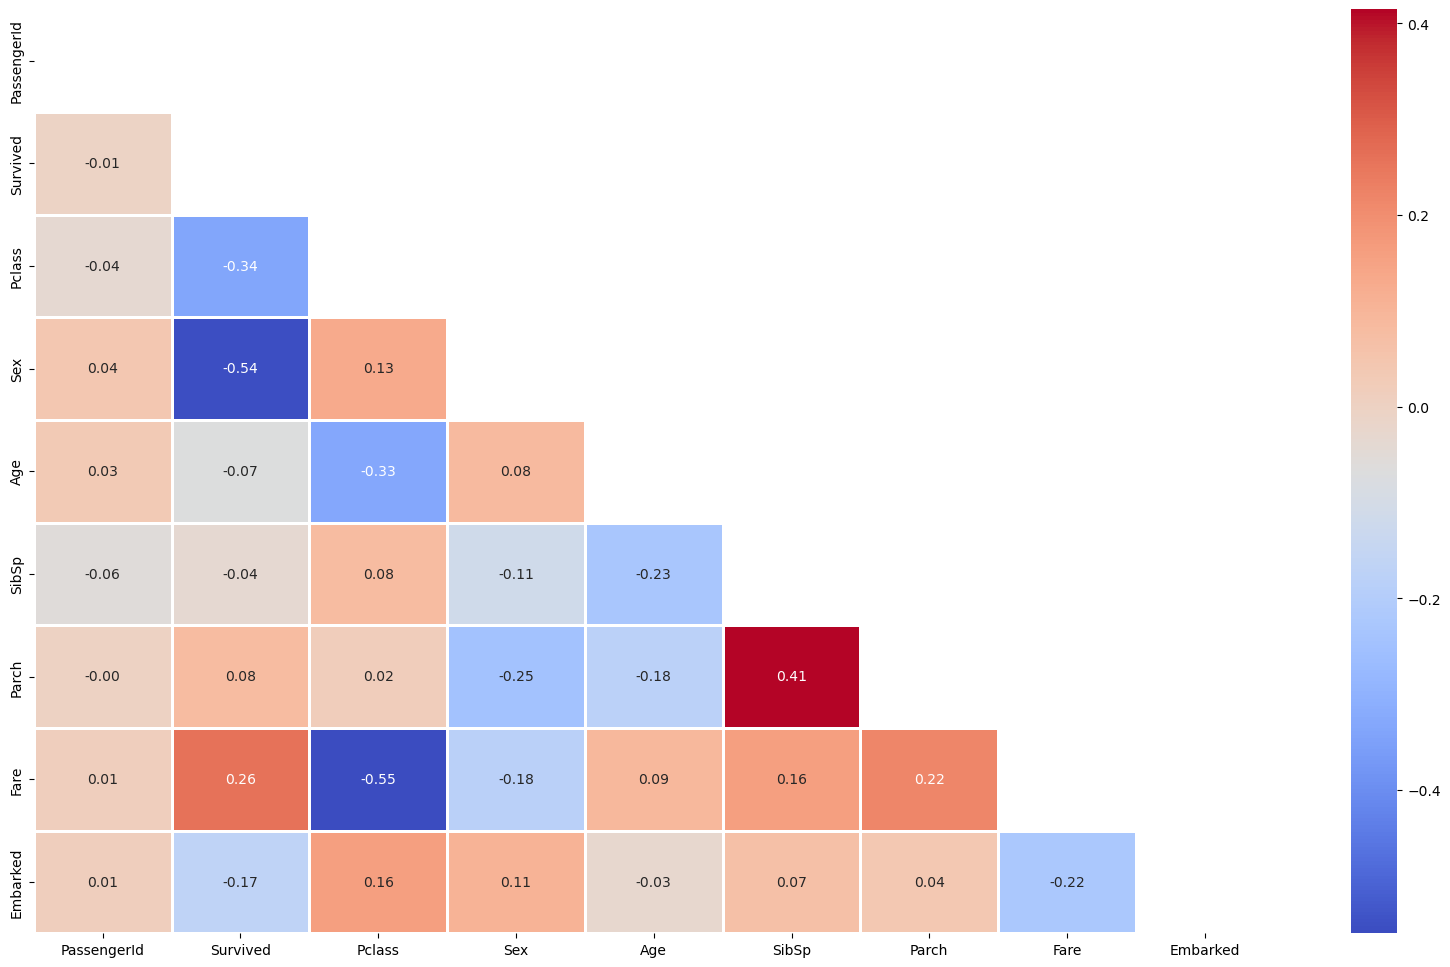

In [73]:
plt.figure(figsize=(20, 12))
corr = data1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = 'coolwarm'
# Plot the heatmap
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt=".2f", cmap=cmap)
plt.show()


# Finsh